# Markers and PROGENy protocol: iPSC to iLSC

May 2024

Constructed by: Julian Arts

Using environment: JA_scenic

Dataset: iPSC differentiation scRNA-seq object

Note: The object used is the converted h5ad object from seur2h5ad (see Git repository)

In [1]:
import scanpy as sc

In [2]:
os_path="s/"
test_obj = sc.read_h5ad(f'/mnt/{os_path}Radboud/data/scRNAseq_ipsc/correct/converted.h5ad')
test_obj

/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 4840 × 23713
    obs: 'orig.ident', 'nCount_sf', 'nFeature_sf', 'sample', 'assembly', 'descriptive_name', 'cell_type', 'timepoint', 'batch', 'replica', 'medium', 'altexps_ERCC_percent', 'altexps_MT_percent', 'scDblFinder_doublet_score', 'scDblFinder_weighted', 'decontX_contamination', 'cell_type_time', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'sf_snn_res.0.4', 'seurat_clusters', 'sf_snn_res.0.1', 'sf_snn_res.0.2', 'sf_snn_res.0.3', 'sf_snn_res.0.5', 'sf_snn_res.0.6', 'sf_snn_res.0.7', 'sf_snn_res.0.8', 'sf_snn_res.0.9', 'sf_snn_res.1', 'sf_snn_res.1.1', 'sf_snn_res.1.2', 'sf_snn_res.1.3', 'sf_snn_res.1.4', 'sf_snn_res.1.5', 'sf_snn_res.1.6', 'sf_snn_res.1.7', 'sf_snn_res.1.8', 'sf_snn_res.1.9', 'sf_snn_res.2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [3]:
test_obj.obs['cluster_names'] = test_obj.obs['seurat_clusters'].astype('str')
test_obj.obs['cluster_names']

GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_O18                  0
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_N24                  0
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_N22                  0
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_L15                  0
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_J17                  0
                                                                 ..
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_I5     6
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_G9     6
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_H3     6
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_F17    6
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_N6     6
Name: cluster_names, Length: 4840, dtype: object

/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:405: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pd.DataFrame(_matrix.stack(dropna=False))
/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:461: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

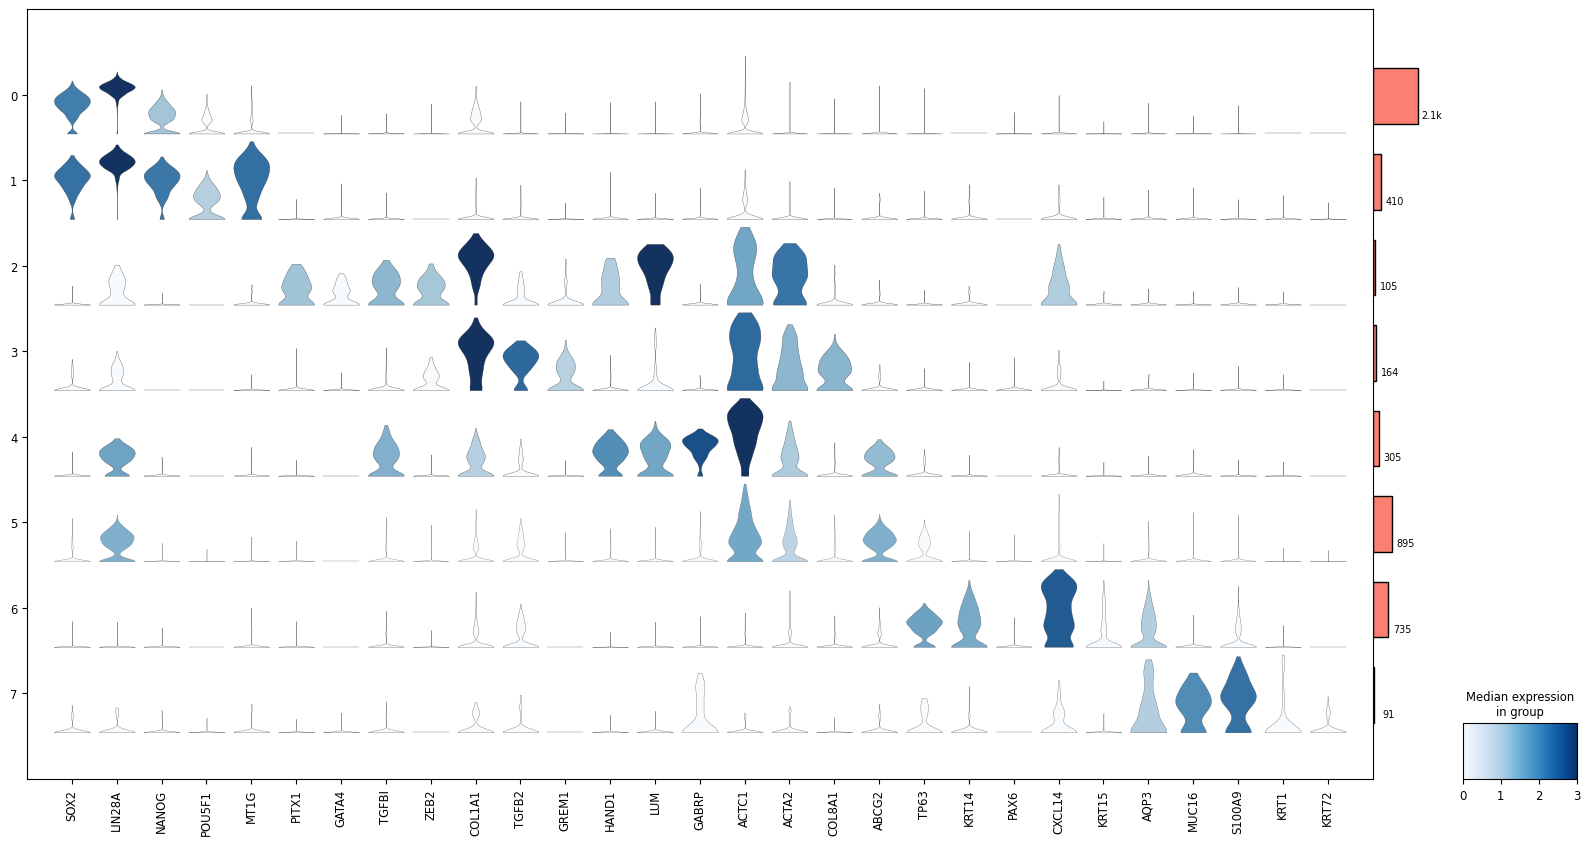

In [4]:
all_markers=["SOX2", "LIN28A", "NANOG", "POU5F1", "MT1G", "PITX1", "GATA4", "TGFBI", "ZEB2", "COL1A1", "TGFB2", "GREM1", "HAND1", "LUM", "GABRP", "ACTC1", "ACTA2", "COL8A1", "ABCG2", "TP63", "KRT14", "PAX6", "CXCL14", "KRT15", "AQP3", "MUC16", "S100A9", "KRT1", "KRT72"]
sc.pl.StackedViolin(test_obj, all_markers, groupby='cluster_names',vmax=3,figsize=[20,10]).add_totals().show()

In [5]:
test_obj.obs["louvain"] = test_obj.obs["cluster_names"].cat.rename_categories({"0": "PSC",
    "1": "PSC-like",
        "2": "meso-like-3",
        "3": "meso-like-2",
        "4": "meso-like-1",
        "5": "early-epi",
        "6": "iLSCs",
        "7": "late-epi"
    })

/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:405: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pd.DataFrame(_matrix.stack(dropna=False))
/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:461: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

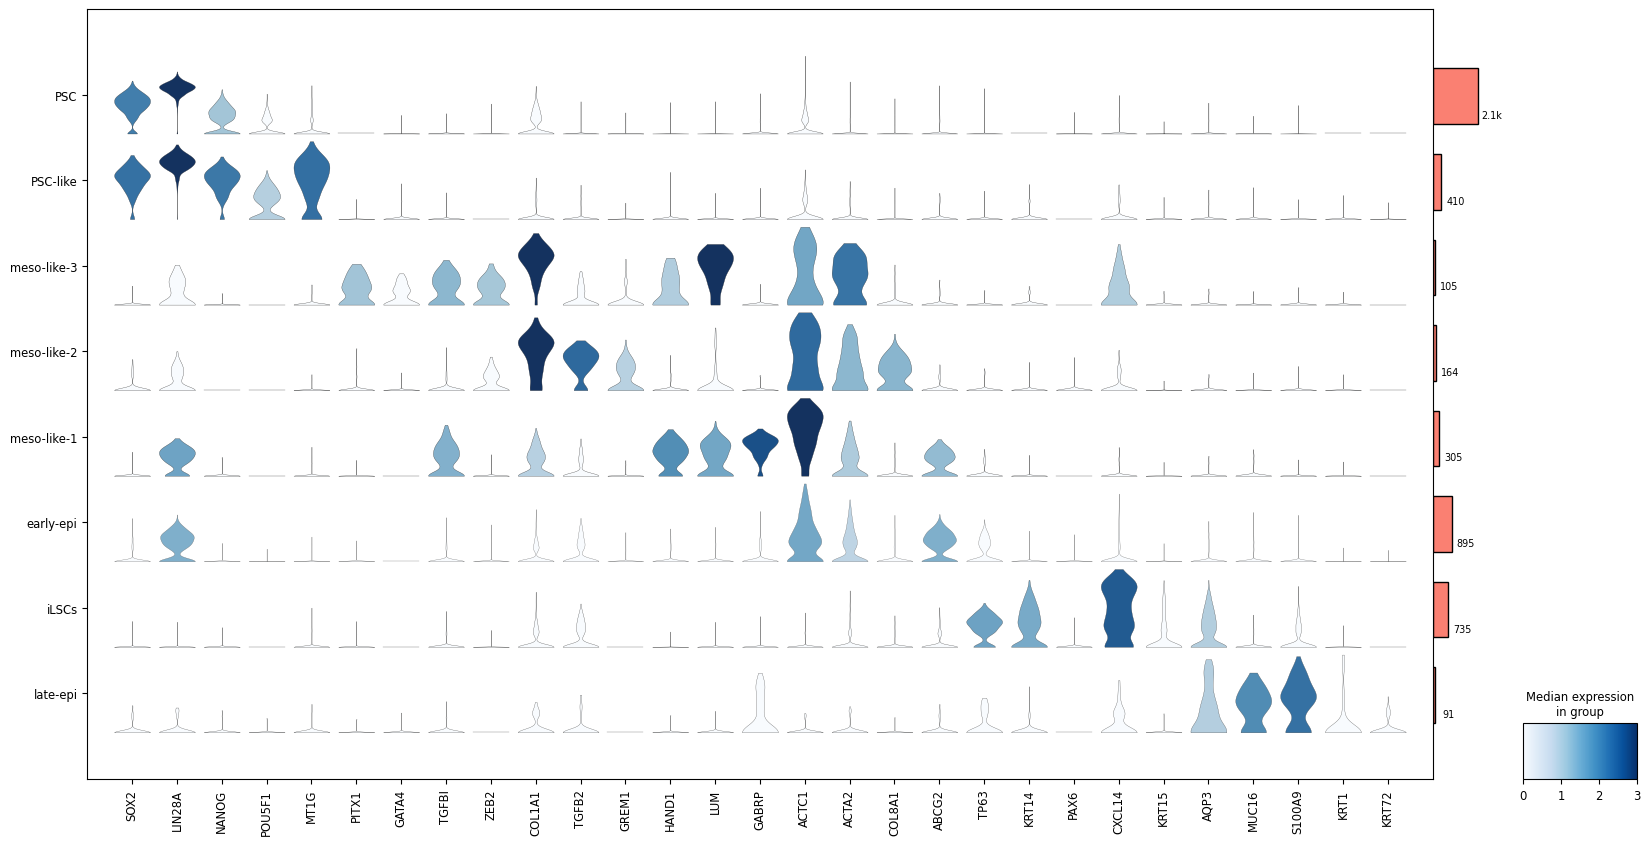

In [6]:
all_markers=["SOX2", "LIN28A", "NANOG", "POU5F1", "MT1G", "PITX1", "GATA4", "TGFBI", "ZEB2", "COL1A1", "TGFB2", "GREM1", "HAND1", "LUM", "GABRP", "ACTC1", "ACTA2", "COL8A1", "ABCG2", "TP63", "KRT14", "PAX6", "CXCL14", "KRT15", "AQP3", "MUC16", "S100A9", "KRT1", "KRT72"]
sc.pl.StackedViolin(test_obj, all_markers, groupby='louvain',vmax=3,figsize=[20,10]).add_totals().show()

In [7]:
test_obj.obs['louvain'].value_counts()

louvain
PSC            2135
early-epi       895
iLSCs           735
PSC-like        410
meso-like-1     305
meso-like-2     164
meso-like-3     105
late-epi         91
Name: count, dtype: int64

/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/share/miniconda3/envs/JA_R_py_39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


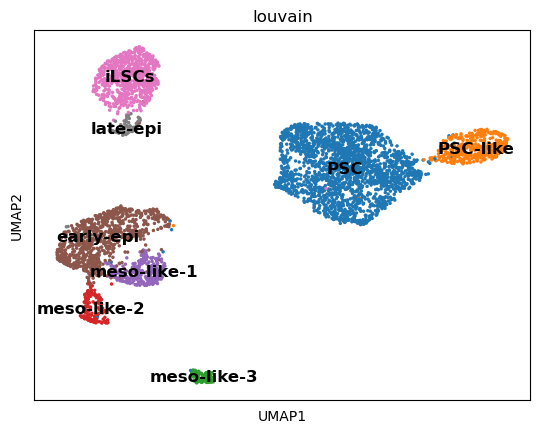

In [8]:
sc.pl.umap(test_obj, color='louvain', legend_loc='on data', legend_fontsize=12)

In [9]:
sc.write(f'/mnt/{os_path}Radboud/data/scRNAseq_ipsc/correct/louvain_ipsc_scrnaseq.h5ad',test_obj)

In [2]:
test_obj = sc.read_h5ad(f'/mnt/{os_path}Radboud/data/scRNAseq_ipsc/correct/louvain_ipsc_scrnaseq.h5ad')

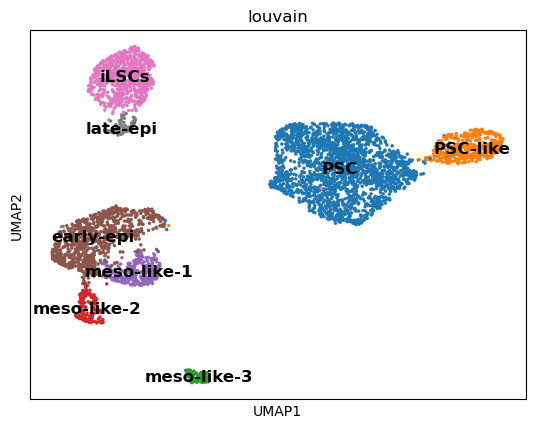

In [3]:
sc.pl.umap(test_obj, color='louvain', legend_loc='on data', legend_fontsize=12)

In [4]:
palette_col={"PSC":"#EFC7EA", "meso-like-1":"#BCED8E", "early-epi":"#EEC591", "iLSCs":"#D68430", "late-epi":"#E5F370", "meso-like-2":"#D8E1A5", "meso-like-3":"#7EAFFA", "PSC-like":"#C996FC"}

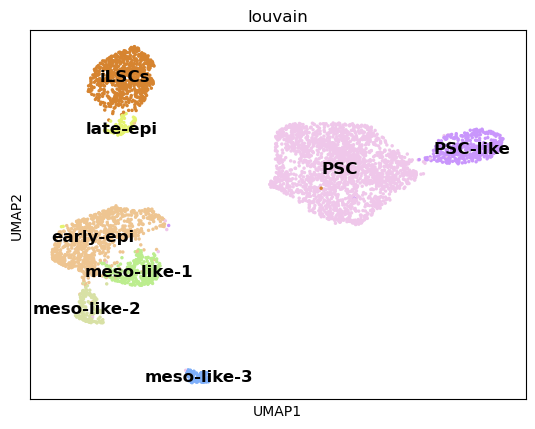

In [5]:
sc.pl.umap(test_obj, color='louvain', legend_loc='on data', legend_fontsize=12,palette=palette_col)

# Plotting canonical LSC and ectoderm/epiderm/epithelial/conjunctival markers

categories: PSC, PSC-like, meso-like-3, etc.
var_group_labels: Known LSC markers, Proposed LSC markers, Developmental stage
 ectoderm markers, etc.


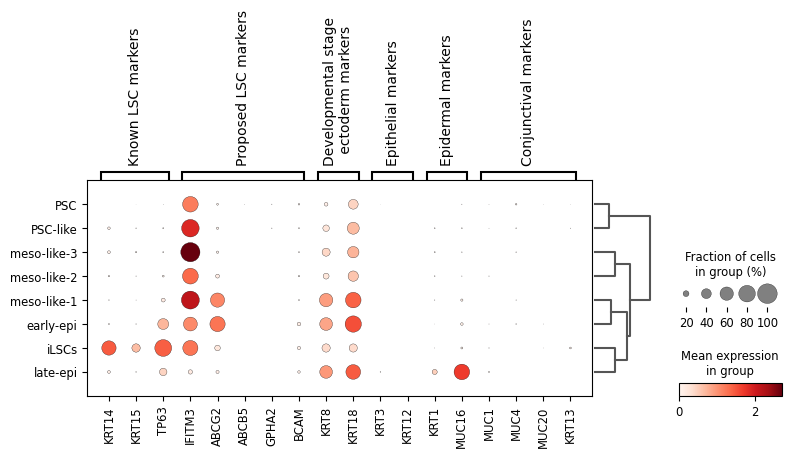

In [7]:
markers = {'Known LSC markers': ["KRT14","KRT15",'TP63'], 'Proposed LSC markers': ["IFITM3","ABCG2",'ABCB5',"GPHA2","BCAM"],'Developmental stage\n ectoderm markers': ["KRT8", "KRT18"],'Epithelial markers': ['KRT3',"KRT12"],'Epidermal markers': ["KRT1","MUC16"], 'Conjunctival markers': ['MUC1','MUC4','MUC20','KRT13']}
sc.pl.dotplot(test_obj, markers, groupby='louvain', dendrogram=True)


# PROGENy analysis

In [8]:
import scanpy as sc
import decoupler as dc

# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [9]:
progeny = dc.get_progeny(organism='human', top=500)
progeny

/usr/share/miniconda3/envs/JA_scenic/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [10]:
dc.run_mlm(
    mat=test_obj,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

6003 features of mat are empty, they will be removed.
Running mlm on mat with 4840 samples and 17710 targets for 14 sources.


100%|██████████| 1/1 [00:04<00:00,  4.68s/it]


In [11]:
test_obj.obsm['mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_O18,-0.188833,-1.172122,0.878139,-0.498147,-1.950172,4.001092,-0.757102,3.859100,2.927454,-0.833325,-6.392918,0.325851,-0.690789,-3.503014
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_N24,-0.428386,0.869623,0.404625,1.263444,-2.224921,5.170656,-0.486688,0.764194,2.091706,-1.263683,-6.737543,0.409890,-0.737081,-5.511395
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_N22,0.652476,0.886530,-1.056658,1.390094,-2.544104,3.648453,-1.939379,3.820913,0.727397,0.052220,-7.148989,0.014230,-0.601658,-7.801497
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_L15,1.689019,0.037454,0.260718,0.520640,-2.004124,4.149757,-1.088809,3.492796,0.989791,-0.603120,-6.931638,1.007144,-0.681214,-4.303566
GRCh38.p13ERCCreporter_batch1_d0_1523_Z04_S7_J17,-0.182864,-0.289160,0.438730,1.164075,-2.197986,4.764639,-1.404948,3.876950,2.645839,-0.034050,-7.074202,0.576144,0.505755,-4.687827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_I5,0.001848,1.225217,-1.080056,1.368308,0.051687,1.885707,-0.865207,3.480052,3.886592,0.512445,-3.878381,1.490139,0.273386,1.865155
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_G9,3.979138,3.827598,-0.412948,3.163116,-0.153042,2.250414,1.163643,3.955944,4.813896,-0.952872,-6.163898,2.421000,0.493480,3.451543
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_H3,1.568345,1.792319,-2.912391,2.130437,-1.356959,-0.489851,1.299999,4.852000,5.559563,-0.235985,-6.650939,2.522319,0.851246,2.199994
GRCh38.p13ERCCreporter_ext_batch3_d24_ESCs_r3_1688_Z22_S18_F17,4.681407,2.819774,-1.967601,8.929766,1.291558,2.484725,0.859183,3.445820,4.831190,-0.582369,-6.050845,1.791277,-0.657444,3.479097


In [12]:
test_obj.obsm['progeny_mlm_estimate'] = test_obj.obsm['mlm_estimate'].copy()
test_obj.obsm['progeny_mlm_pvals'] = test_obj.obsm['mlm_pvals'].copy()
test_obj

AnnData object with n_obs × n_vars = 4840 × 23713
    obs: 'orig.ident', 'nCount_sf', 'nFeature_sf', 'sample', 'assembly', 'descriptive_name', 'cell_type', 'timepoint', 'batch', 'replica', 'medium', 'altexps_ERCC_percent', 'altexps_MT_percent', 'scDblFinder_doublet_score', 'scDblFinder_weighted', 'decontX_contamination', 'cell_type_time', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'sf_snn_res.0.4', 'seurat_clusters', 'sf_snn_res.0.1', 'sf_snn_res.0.2', 'sf_snn_res.0.3', 'sf_snn_res.0.5', 'sf_snn_res.0.6', 'sf_snn_res.0.7', 'sf_snn_res.0.8', 'sf_snn_res.0.9', 'sf_snn_res.1', 'sf_snn_res.1.1', 'sf_snn_res.1.2', 'sf_snn_res.1.3', 'sf_snn_res.1.4', 'sf_snn_res.1.5', 'sf_snn_res.1.6', 'sf_snn_res.1.7', 'sf_snn_res.1.8', 'sf_snn_res.1.9', 'sf_snn_res.2', 'cluster_names', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'louvain_colors', 'neighbors', 'dendrogram_louvain'
    obsm: 'X_pca', 'X_umap'

In [13]:
acts = dc.get_acts(test_obj, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 4840 × 14
    obs: 'orig.ident', 'nCount_sf', 'nFeature_sf', 'sample', 'assembly', 'descriptive_name', 'cell_type', 'timepoint', 'batch', 'replica', 'medium', 'altexps_ERCC_percent', 'altexps_MT_percent', 'scDblFinder_doublet_score', 'scDblFinder_weighted', 'decontX_contamination', 'cell_type_time', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'sf_snn_res.0.4', 'seurat_clusters', 'sf_snn_res.0.1', 'sf_snn_res.0.2', 'sf_snn_res.0.3', 'sf_snn_res.0.5', 'sf_snn_res.0.6', 'sf_snn_res.0.7', 'sf_snn_res.0.8', 'sf_snn_res.0.9', 'sf_snn_res.1', 'sf_snn_res.1.1', 'sf_snn_res.1.2', 'sf_snn_res.1.3', 'sf_snn_res.1.4', 'sf_snn_res.1.5', 'sf_snn_res.1.6', 'sf_snn_res.1.7', 'sf_snn_res.1.8', 'sf_snn_res.1.9', 'sf_snn_res.2', 'cluster_names', 'louvain'
    uns: 'louvain_colors', 'neighbors', 'dendrogram_louvain'
    obsm: 'X_pca', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'

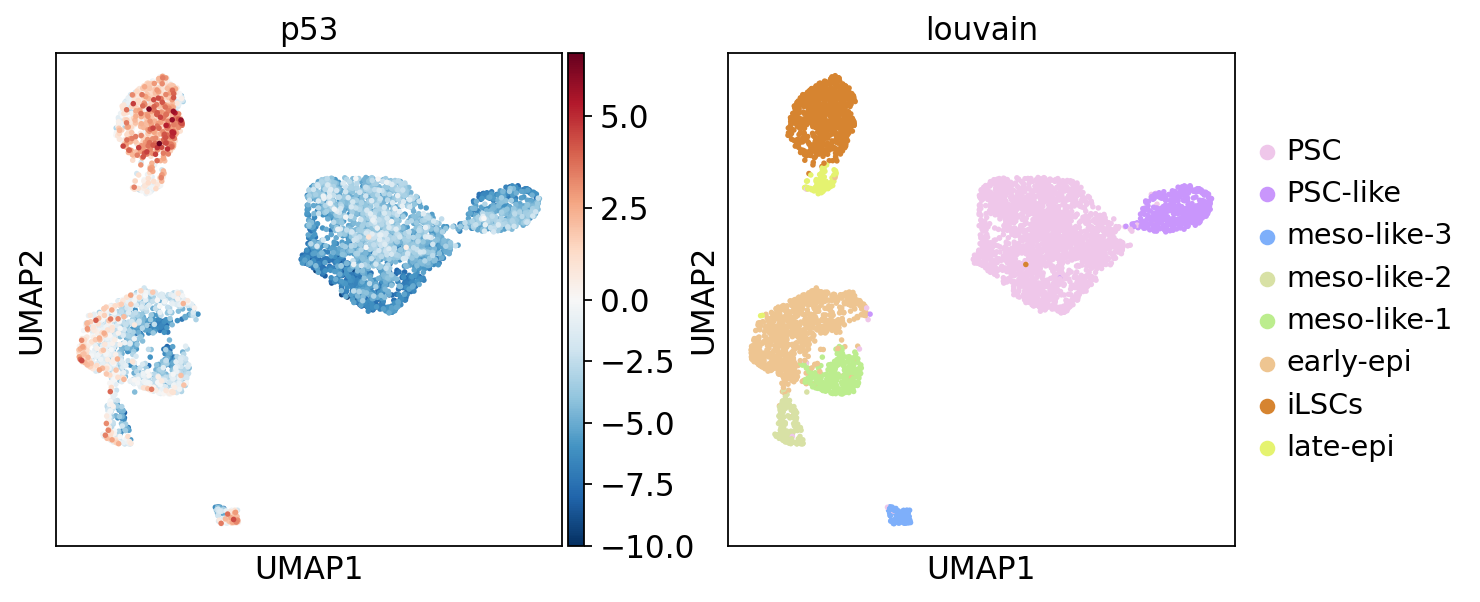

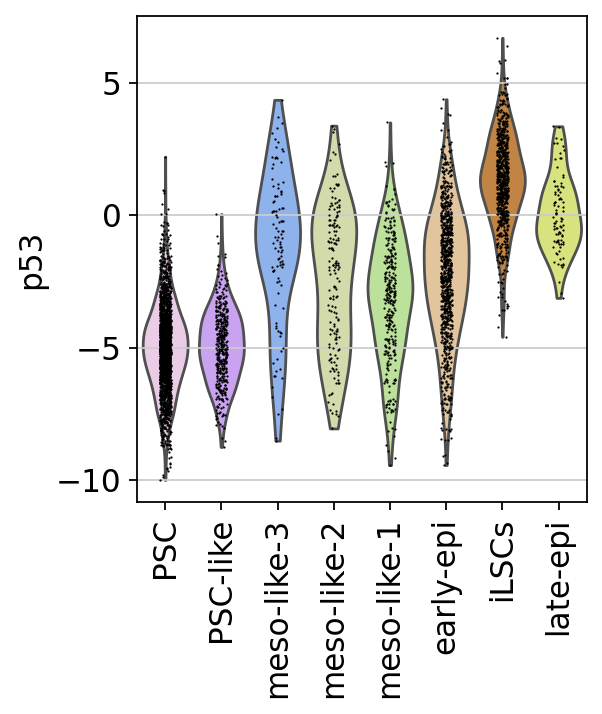

In [14]:
sc.pl.umap(acts, color=['p53', 'louvain'], cmap='RdBu_r', vcenter=0, palette=palette_col)
sc.pl.violin(acts, keys=['p53'], groupby='louvain', rotation=90)

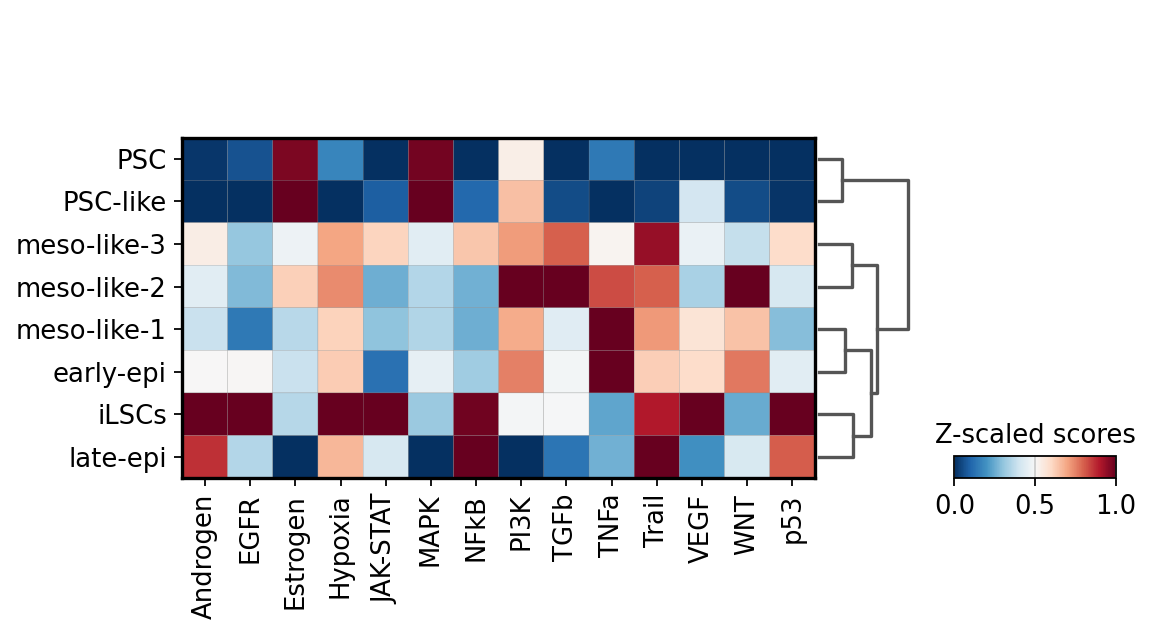

In [17]:
# Standard_scale "var" sets the original progeny scores between 0 and 1 to highlight the differences better
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='louvain', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

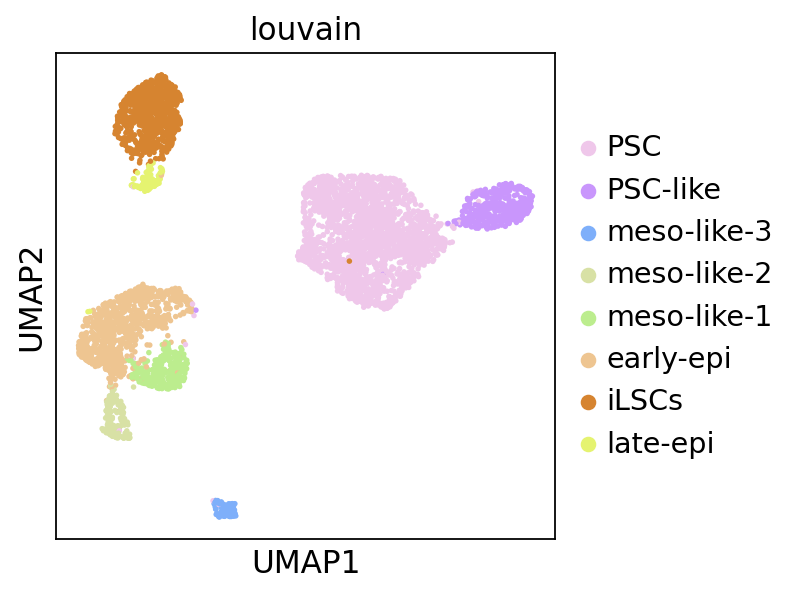

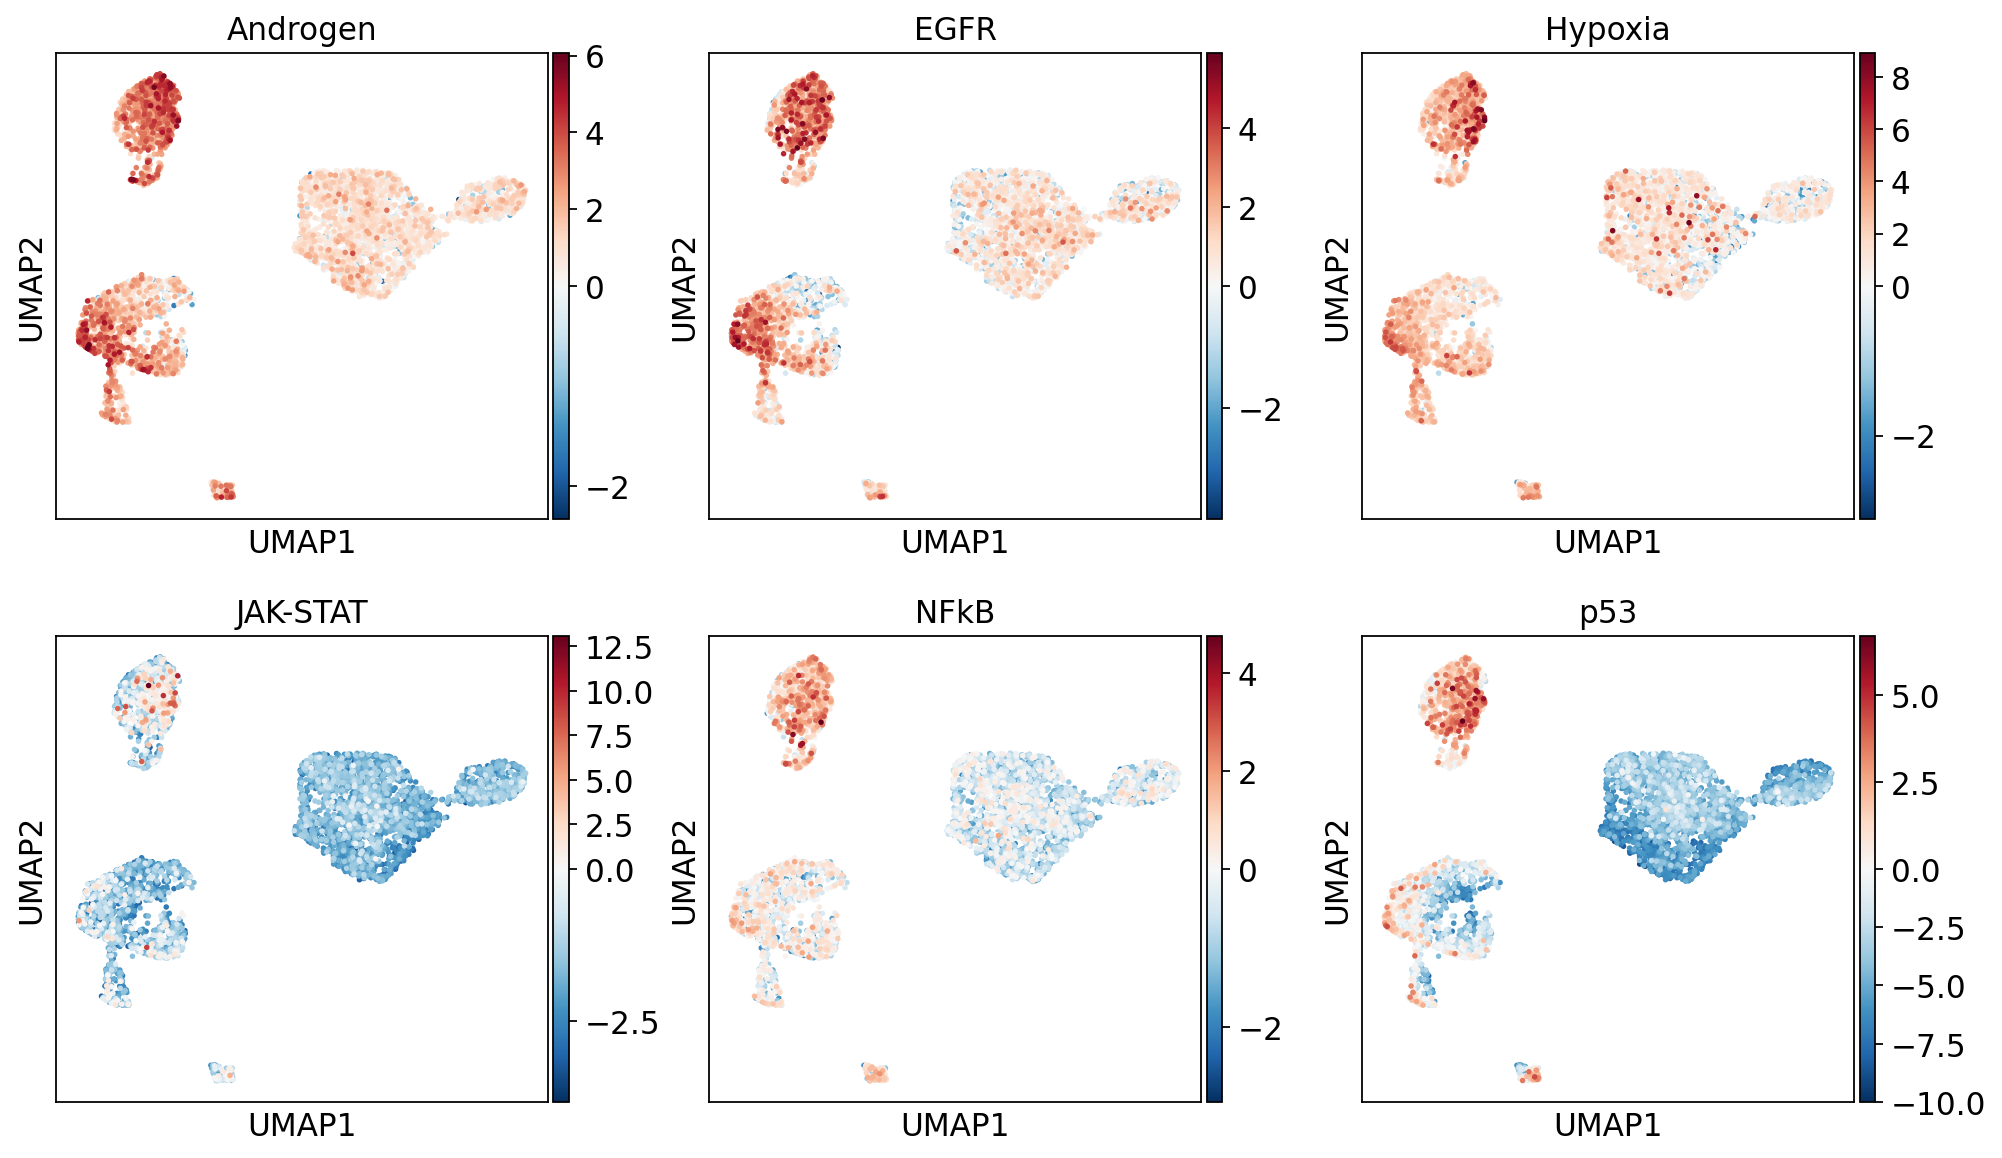

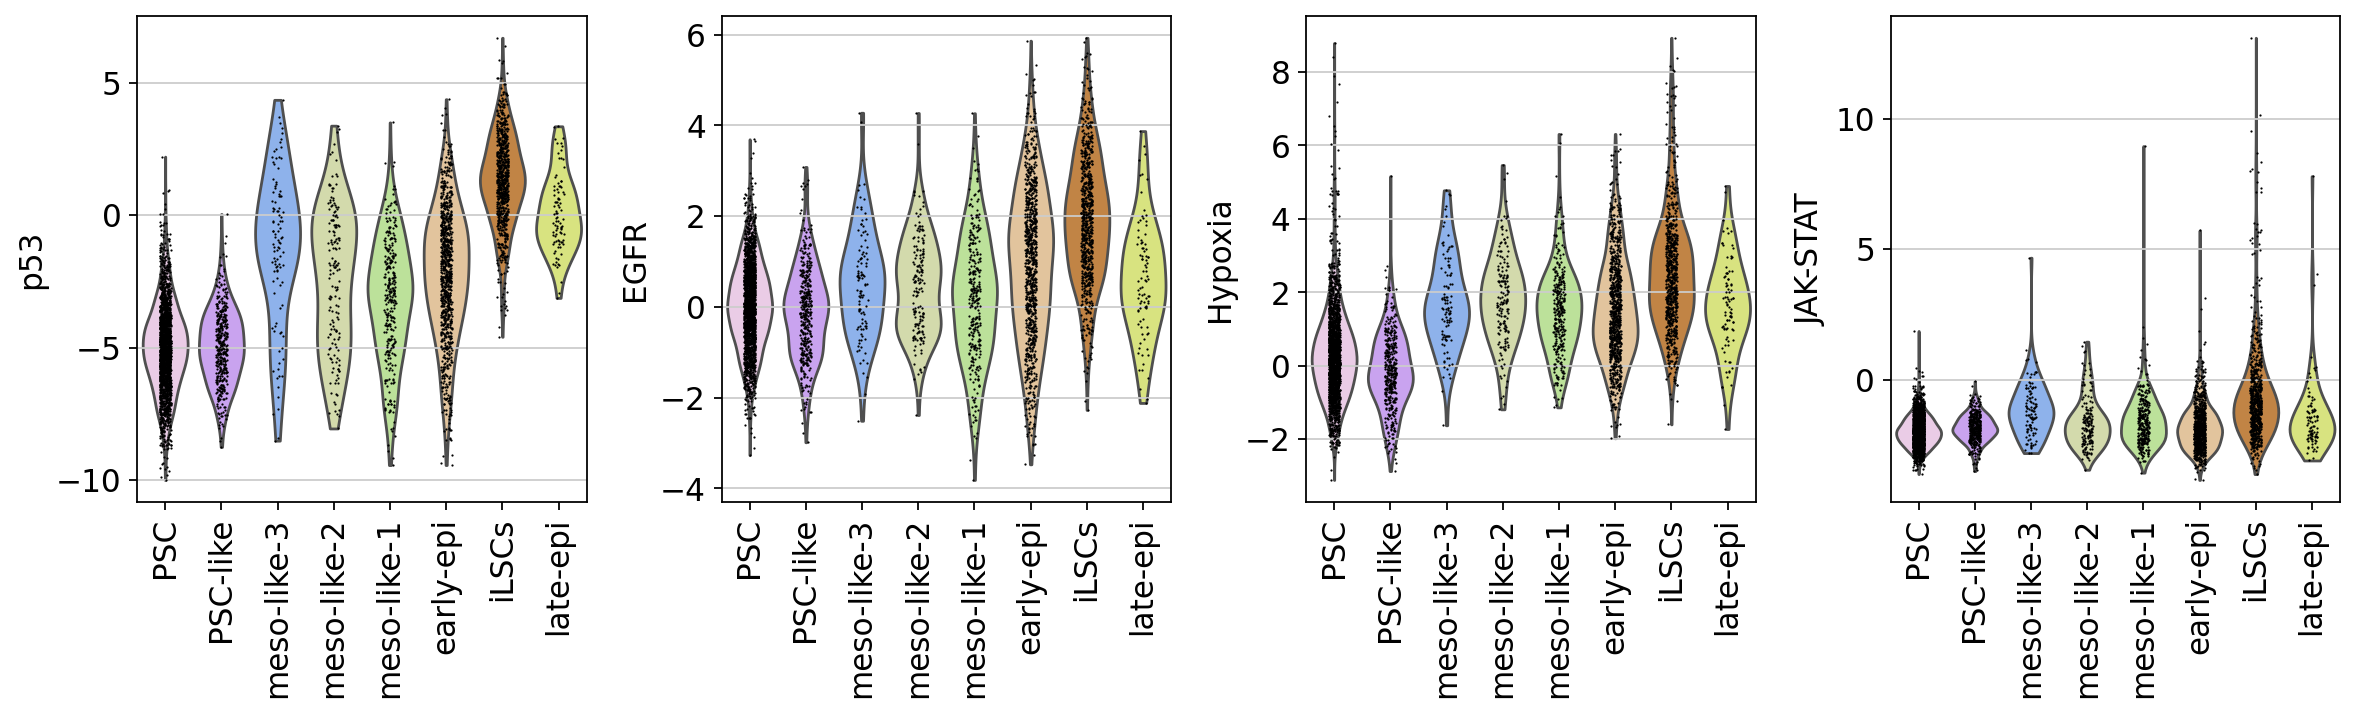

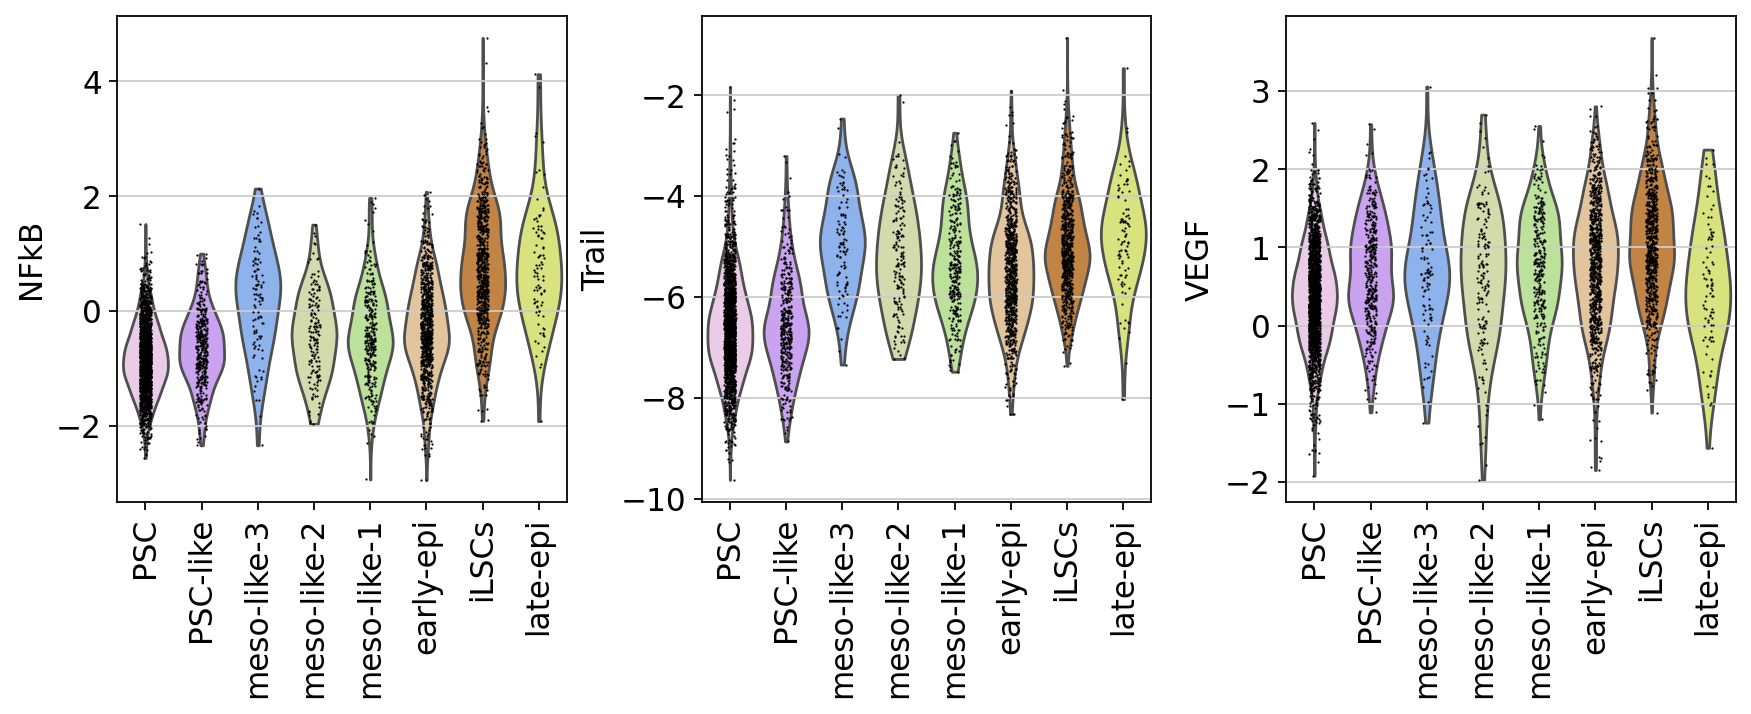

In [19]:
sc.set_figure_params(figsize=(5, 5))
sc.set_figure_params(scanpy=True, fontsize=14)
sc.pl.umap(acts, color=['louvain'],ncols=4 ,cmap='RdBu_r', palette=palette_col)
sc.pl.umap(acts, color=['Androgen', "EGFR","Hypoxia","JAK-STAT","NFkB","p53"],legend_loc="on data",ncols=3 ,cmap='RdBu_r', vcenter=0, palette=palette_col)
sc.pl.violin(acts, keys=['p53', "EGFR","Hypoxia","JAK-STAT"], groupby='louvain', rotation=90)
sc.pl.violin(acts, keys=["NFkB","Trail","VEGF"], groupby='louvain', rotation=90)